# Data Processing 

## Network analysis

In [12]:
import os
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import warnings
import ijson
%matplotlib inline

In [2]:
edge_list_tag_path = os.path.join("Tags")

In [41]:
# create edge list

In [15]:
for the_file in os.listdir(edge_list_tag_path):
    if not "_ordered" in the_file:
        continue
    if not the_file == "javascript_ordered.json":
        continue
    file_path = os.path.join(edge_list_tag_path, the_file)
    list_path = os.path.join(edge_list_tag_path, the_file.replace(".json", "_list.txt"))
    with open(file_path,'r') as e, open(list_path,'w') as l:
        edges = ijson.items(e, "edges.item")
        for edge in edges:
            l.write(edge["q_id"]+ " " + edge["a_id"]+ " "+ edge["time"]+ "\n")#+ " "+ edges["votes"])

In [3]:
#for the_file in os.listdir(edge_list_tag_path):
#    if not "_list" in the_file:
#        continue
#    if not the_file == "javascript_ordered_list.json":
#        continue
#    list_path = os.path.join(edge_list_tag_path, the_file)
#    with open(list_path,'r') as e:
js_network = nx.read_edgelist(os.path.join("Tags", "javascript_ordered_list.json"),nodetype=int, data=(('time',str),)) 

In [4]:
nx.number_connected_components(js_network)

36140

In [5]:
js_network.number_of_selfloops ()

52750

In [7]:
np.asarray(list(js_network.degree(js_network.nodes()).values())).mean()

3.6703457896212779

(array([  4.17112000e+05,   7.70000000e+01,   1.20000000e+01,
          8.00000000e+00,   5.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([  1.00000000e+00,   3.60000000e+02,   7.19000000e+02,
          1.07800000e+03,   1.43700000e+03,   1.79600000e+03,
          2.15500000e+03,   2.51400000e+03,   2.87300000e+03,
          3.23200000e+03,   3.59100000e+03]),
 <a list of 10 Patch objects>)

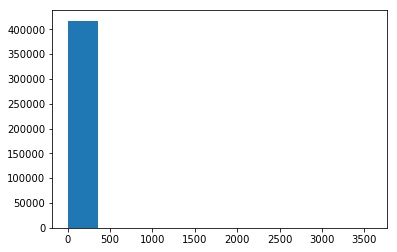

In [42]:
degrees_dict = js_network.degree()
degrees = np.asarray([ [key,degrees_dict[key]] for key in degrees_dict])
plt.hist(degrees[:,1])

In [66]:
degrees_unique = np.unique(degrees[:,1])
degrees_num, tmp = np.histogram(degrees, bins=degrees_unique.shape[0])

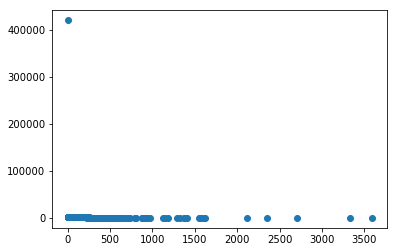

In [67]:
plt.scatter(degrees_unique, degrees_num)

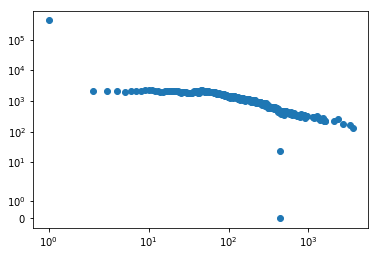

In [86]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(degrees_unique, degrees_num)
ax.set_yscale('symlog')
ax.set_xscale('symlog')

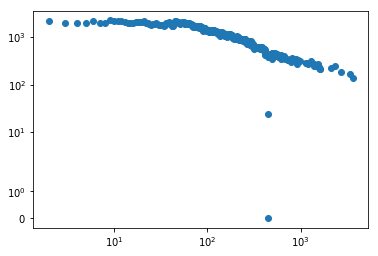

In [87]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(degrees_unique[1:], degrees_num[1:])
ax.set_yscale('symlog')
ax.set_xscale('symlog')

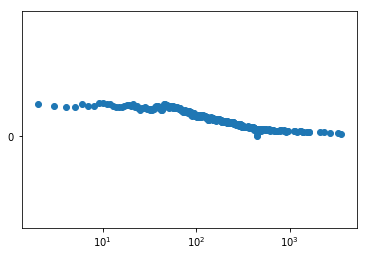

In [90]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(degrees_unique[1:], degrees_num[1:]/ degrees_num[:1].sum())
ax.set_yscale('symlog')
ax.set_xscale('symlog')

In [14]:
nx.average_clustering(js_network)

0.0014143541943343108

In [15]:
comps = nx.connected_component_subgraphs(js_network)

In [16]:
max_comp = max(comps, key=len)
len(max_comp.nodes())

357624

In [ ]:
nx.diameter(max_comp)

(array([  3.57517000e+05,   7.70000000e+01,   1.20000000e+01,
          8.00000000e+00,   5.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([  1.00000000e+00,   3.60000000e+02,   7.19000000e+02,
          1.07800000e+03,   1.43700000e+03,   1.79600000e+03,
          2.15500000e+03,   2.51400000e+03,   2.87300000e+03,
          3.23200000e+03,   3.59100000e+03]),
 <a list of 10 Patch objects>)

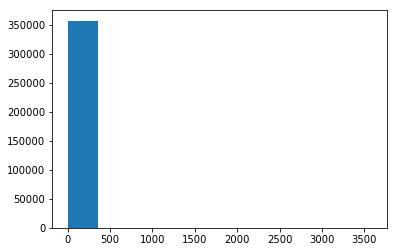

In [48]:
max_degrees_dict = max_comp.degree()
max_degrees = np.asarray([ [key,max_degrees_dict[key]] for key in max_degrees_dict])
plt.hist(max_degrees[:,1])